### Loading...

In [53]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [2]:
path = "C:/users/hitesh/Learning/Skillenza/HUL BFS/data/"

In [3]:
filename1 = "train.csv"
filename2 = "test.csv"

### File1

In [4]:
data1 = pd.read_csv(path+filename1)

In [5]:
data1.shape

(1000, 12)

In [6]:
data1.columns

Index(['v.id', 'on road old', 'on road now', 'years', 'km ', 'rating',
       'condition', 'economy', 'top speed', 'hp', 'torque', 'current price'],
      dtype='object')

In [7]:
data1.head(3)

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0


### File2

In [8]:
data2 = pd.read_csv(path+filename2)

In [9]:
data2.head(3)

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque
0,1,514396,881378,3,115717,3,4,10,144,70,117
1,2,654594,749943,7,135999,1,2,13,161,51,70
2,3,559836,865594,4,142651,1,6,10,184,116,72


In [10]:
testX = data2.iloc[:,1:]
testX.head(2)

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque
0,514396,881378,3,115717,3,4,10,144,70,117
1,654594,749943,7,135999,1,2,13,161,51,70


### Preprocessing

In [11]:
trainX = data1.iloc[:,1:-1]
trainX.head(2)

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque
0,535651,798186,3,78945,1,2,14,177,73,123
1,591911,861056,6,117220,5,9,9,148,74,95


In [12]:
trainY = data1.iloc[:,-1]

In [13]:
"""
 Changing all categorical variables into columns 
 'years', 'rating', 'condition', 'economy'
"""

"\n Changing all categorical variables into columns \n 'years', 'rating', 'condition', 'economy'\n"

In [14]:
cat_col = ['years', 'rating', 'condition', 'economy']

In [15]:
trainX.shape

(1000, 10)

In [16]:
def ohe(df, col):
    encode = []
    for c in col:
        encode.append(pd.get_dummies(df[c], prefix= c))
    return pd.concat(encode, axis= 1)

In [17]:
train_ohe = ohe(trainX, cat_col)

In [18]:
train_ohe.head()

,years_2,years_3,years_4,years_5,years_6,years_7,rating_1,rating_2,rating_3,rating_4,...,condition_9,condition_10,economy_8,economy_9,economy_10,economy_11,economy_12,economy_13,economy_14,economy_15
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0


In [19]:
trainX.drop(columns= cat_col, axis=1,inplace= True)

In [20]:
trainX = trainX.join(train_ohe)
trainX.shape

(1000, 35)

In [21]:
cat_col2 = ['years', 'rating', 'condition', 'economy']

In [22]:
test_ohe = ohe(testX, cat_col2)

In [23]:
test_ohe.head()

,years_2,years_3,years_4,years_5,years_6,years_7,rating_1,rating_2,rating_3,rating_4,...,condition_9,condition_10,economy_8,economy_9,economy_10,economy_11,economy_12,economy_13,economy_14,economy_15
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [24]:
testX.drop(columns= cat_col2, axis=1,inplace= True)

C:\Users\hitesh\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [25]:
testX = testX.join(test_ohe)
testX.shape

(100, 35)

In [26]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()

In [27]:
X = scaler1.fit_transform(trainX)

C:\Users\hitesh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [28]:
X

array([[0.1772899 , 0.49138298, 0.28742292, ..., 0.        , 1.        ,
        0.        ],
       [0.4591621 , 0.80608072, 0.67179497, ..., 0.        , 0.        ,
        0.        ],
       [0.93552411, 0.35411129, 0.82562413, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.73188072, 0.71436437, 0.3655225 , ..., 0.        , 0.        ,
        0.        ],
       [0.17682896, 0.16228432, 0.90536062, ..., 0.        , 0.        ,
        0.        ],
       [0.45011373, 0.39906597, 0.17042921, ..., 0.        , 0.        ,
        0.        ]])

In [29]:
testX = scaler2.fit_transform(testX)

C:\Users\hitesh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [30]:
testX

array([[0.06366437, 0.90725971, 0.65864028, ..., 0.        , 0.        ,
        0.        ],
       [0.77885812, 0.24669933, 0.86444444, ..., 1.        , 0.        ,
        0.        ],
       [0.29546799, 0.82793316, 0.93194318, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.92786235, 0.60702098, 0.1373313 , ..., 1.        , 0.        ,
        0.        ],
       [0.08076397, 0.36733258, 0.4916895 , ..., 0.        , 0.        ,
        0.        ],
       [0.02306813, 0.47273276, 0.09736175, ..., 0.        , 0.        ,
        1.        ]])

In [31]:
from sklearn.model_selection import  train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, trainY, test_size=0.3, shuffle = True, random_state=0)

In [33]:
X_train.shape

(700, 35)

In [34]:
X_test.shape

(300, 35)

### Model1 - Linear

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
reg = LinearRegression()

In [37]:
reg.fit(X,trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
y_pred1 = reg.predict(X_test)

In [40]:
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
mean_squared_error(y_test,y_pred1)

9.699938967640496e-20

In [42]:
r2_score(y_test,y_pred1)

1.0

In [ ]:
"""
    Result1 
    MSE: 9.699938967640496e-20
    R2: 1.0
"""

In [43]:
res1 = pd.DataFrame({"y_test": y_test,"y_pred": y_pred1 , "diff": y_test - y_pred1})

C:\Users\hitesh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


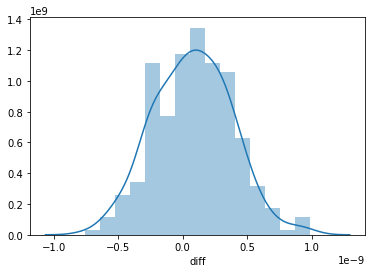

In [44]:
sns.distplot(res1["diff"])

In [38]:
pred = reg.predict(testX)

In [46]:
res1 = pd.DataFrame({"v.id": data2["v.id"], "current price": pred})

In [49]:
res1.to_csv("res1.csv", index= False)

### Model2 - Ensemble Models

In [60]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [88]:
from sklearn.metrics import mean_squared_error

In [89]:
reg2 = RandomForestRegressor()

In [97]:
# specify parameters and distributions to sample from
param_dist = {"max_depth": [8,10,12] ,
          "min_samples_split": [1,2] ,
           "n_estimators" : [150,180,200,250],
           "min_samples_split": [2,3] ,
          "min_samples_leaf": [2,3]
          }

# run randomized search
grid_search = GridSearchCV(reg2, param_grid=param_dist, cv = 5, 
                           iid=False ,scoring= 'neg_mean_squared_log_error')
grid_search.fit(X_train,y_train)

predict3 = grid_search.best_estimator_.predict(X_test)
mse3 = mean_squared_error(y_test,predict3)

In [98]:
print("MSE: {}".format(mse2))
print("Best Estimator parameter {}".format(random_search.best_params_))

MSE: 422990193.6396254
Best Estimator parameter {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}


In [75]:
# specify parameters and distributions to sample from
param_dist = {"max_depth": sp_randint(1, 11),
          "min_samples_split": sp_randint(2.0, 8.0),
           "n_estimators" : [150,180,200,250],
           "min_samples_split": sp_randint(2.0, 8.0),
          "min_samples_leaf": sp_randint(1.0, 8.0)
          }

# run randomized search
random_search = RandomizedSearchCV(reg2, param_distributions=param_dist, cv = 3, n_iter=n_iter_search, iid=False)
random_search.fit(X_train,y_train)

predict2 = random_search.best_estimator_.predict(X_test)
mse2 = mean_squared_error(y_test,predict2)

In [76]:
print("MSE: {}".format(mse2))
print("Best Estimator parameter {}".format(random_search.best_params_))

MSE: 422990193.6396254
Best Estimator parameter {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}


In [79]:
pred2 = random_search.best_estimator_.predict(X_test)

In [81]:
r = pd.DataFrame({'pred1': y_pred1 ,'pred2': predict2, 'diff': y_pred1 - predict2})

### Model2 - GBT Regressor

In [99]:
from xgboost import  XGBRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [100]:
xgb = XGBRegressor(learning_rate = 0.3, max_depth = 1, min_samples_leaf = 5, min_samples_split = 2, 
                   n_estimators = 180)

#### RandomSearchCV

In [111]:
# specify parameters and distributions to sample from

param_dist = {"max_depth": sp_randint(1, 11),
          "learning_rate": [0.05,0.1,0.3,0.5],
          "min_samples_split": sp_randint(2, 8),
           "n_estimators" : [150,180,200],
           "min_samples_split": sp_randint(1, 8),
          "min_samples_leaf": sp_randint(1, 8)
          }
# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV( xgb, param_distributions=param_dist,
                               n_iter=n_iter_search, cv=5, iid=False)
random_search.fit(X_train,y_train)

predict3 = random_search.best_estimator_.predict(X_test)
mse3 = mean_squared_error(y_test,predict3)

ValueError: Parameter values for parameter (max_depth) need to be a sequence(but not a string) or np.ndarray.

In [ ]:
""" RandomSearchCV results
 
MSE: 89567096.01817103
Best Estimator parameter {'learning_rate': 0.3, 'max_depth': 2, 'min_samples_leaf': 4, 
                            'min_samples_split': 5, 'n_estimators': 180}
                            
MSE: 161855486.39035302
Best Estimator parameter {'learning_rate': 0.1, 'max_depth': 1, 'min_samples_leaf': 1, 
                            'min_samples_split': 1, 'n_estimators': 180}
"""

#### GridSearchCV

In [128]:
# specify parameters and distributions to sample from
param_dist = {"max_depth": [1,2,3],
          "learning_rate": [0.1,0.2,0.3,0.4],
          "min_samples_split": [1,2,3],
           "n_estimators" : [500,750,1000],
         "min_samples_split": [1,2,3],
          "min_samples_leaf": [1,2,3]
          }

# run grid search
g_search = GridSearchCV( xgb, param_grid=param_dist, cv=5, iid=False,verbose= 1,n_jobs= -1)
g_search.fit(X_train,y_train)

predict4 = g_search.best_estimator_.predict(X_test)
mse4 = mean_squared_error(y_test,predict4)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   59.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:  9.6min finished


In [ ]:
"""
MSE: 72686834.79684693
Best Estimator parameter {'learning_rate': 0.3, 'max_depth': 1, 'min_samples_leaf': 1,
                            'min_samples_split': 1, 'n_estimators': 1000}

********* BEST *****************
MSE: 62748149.15047404
Best Estimator parameter {'learning_rate': 0.2, 'max_depth': 2, 'min_samples_leaf': 1, 
                            'min_samples_split': 1, 'n_estimators': 500}

MSE: 73073236.79288188
Best Estimator parameter {'learning_rate': 0.2, 'max_depth': 2, 'min_samples_leaf': 1, 
                            'min_samples_split': 1, 'n_estimators': 300}
                        
MSE: 77506547.97527039
Best Estimator parameter {'learning_rate': 0.2, 'max_depth': 2, 'min_samples_leaf': 1, 
                            'min_samples_split': 1, 'n_estimators': 250}
                            
MSE: 87358057.35450073
Best Estimator parameter {'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 200}

MSE: 86673914.40737487
Best Estimator parameter {'learning_rate': 0.3, 'max_depth': 2, 'min_samples_leaf': 2, 
                            'min_samples_split': 2, 'n_estimators': 220}
"""

In [130]:
xgb1 = XGBRegressor(learning_rate= 0.2, max_depth=2, n_estimators= 500, min_samples_leaf = 1, min_samples_split = 1 )

In [131]:
xgb1.fit(X,trainY)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=2, min_child_weight=1, min_samples_leaf=1,
       min_samples_split=1, missing=None, n_estimators=500, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [136]:
predict4 = xgb1.predict(testX)

In [137]:
res_xgb = pd.DataFrame({"v.id": data2["v.id"], "current price": predict4})

In [139]:
res_xgb.to_csv("xgbres.csv", index= False)

In [ ]:
sns.distplot(res2["diff"])